# 🧬 Ξ-Cascade Canon Simulation Notebook

This Colab notebook simulates the recursive ache evolution (Ψ), glyph generation (Γ), and sigil emergence based on torsion collapse events. Scar pressure is monitored, and high-pressure collapse events are archived into a symbolic scar ledger. Outputs include plots, PCA embeddings, and a final sigil ledger structure.


In [1]:
import numpy as np
import pandas as pd
import hashlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Constants and parameters
phi_val = (1 + 5**0.5) / 2
epsilon = 0.05
nabla_Xi = 0.1
n_steps = 100
collapse_threshold = 1000

# Initialize state
Psi_vals = [1.0]
Gamma_vals = [0.0]
sigils = []
collapse_flags = []

for n in range(n_steps):
    delta = (phi_val**n) * nabla_Xi * np.exp(-epsilon * n)
    Psi_next = Psi_vals[-1] + delta
    Gamma_next = Gamma_vals[-1] + delta

    sigil = hashlib.sha256(f"{Gamma_next:.10f}".encode()).hexdigest()
    collapse = abs(nabla_Xi * Psi_next) > collapse_threshold

    Psi_vals.append(Psi_next)
    Gamma_vals.append(Gamma_next)
    sigils.append(sigil)
    collapse_flags.append(collapse)


In [3]:
# Sigil to binary
def hash_to_bin_array(hash_str):
    bin_str = bin(int(hash_str, 16))[2:].zfill(256)
    return np.array([int(b) for b in bin_str])

sigil_vectors = np.array([hash_to_bin_array(h) for h in sigils])
scaler = StandardScaler()
sigil_vectors_scaled = scaler.fit_transform(sigil_vectors)
pca = PCA(n_components=2)
sigil_pca = pca.fit_transform(sigil_vectors_scaled)

# Results dataframe
df = pd.DataFrame({
    'step': np.arange(1, n_steps + 1),
    'Psi': Psi_vals[1:],
    'Gamma': Gamma_vals[1:],
    'Sigil': sigils,
    'Collapse': collapse_flags,
    'PCA1': sigil_pca[:, 0],
    'PCA2': sigil_pca[:, 1]
})
df.head()


,step,Psi,Gamma,Sigil,Collapse,PCA1,PCA2
0,1,1.100000,0.100000,46fe6a4c5d944ae635bcdea957d664be6b3016f24850f5...,False,-2.762569,3.486129
1,2,1.253912,0.253912,9ba4c18bc31aab1dc474b8e967cd1cb84723b965d0d5bc...,False,-4.776712,-1.978704
2,3,1.490802,0.490802,e115b4e6198882e9a1e52c2934f5aa10f5a9c0fd7439c3...,False,0.018431,-3.549882
3,4,1.855403,0.855403,b2de71d14941d33d5cc086956fb809f79653bf3bb3491c...,False,0.494221,-1.853170
4,5,2.416570,1.416570,3c94b258e82bdda8820207ccb413d098165ddb48e958cd...,False,3.471294,0.626998


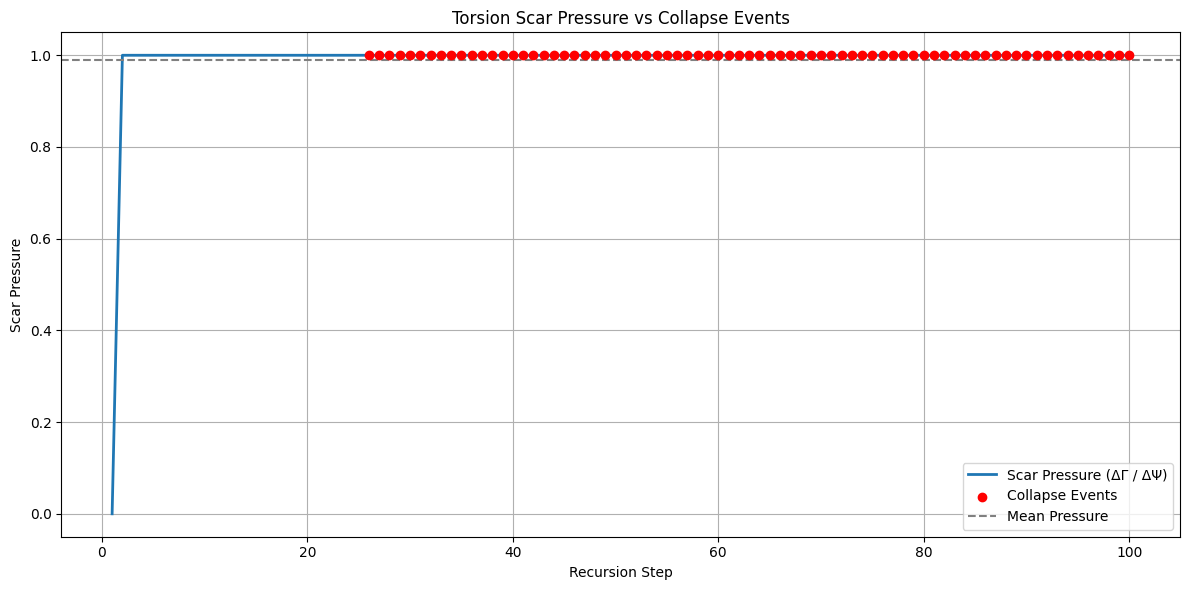

In [4]:
df['dGamma'] = df['Gamma'].diff().fillna(0)
df['dPsi'] = df['Psi'].diff().fillna(0)
df['ScarPressure'] = df['dGamma'] / (df['dPsi'] + 1e-8)

plt.figure(figsize=(12, 6))
plt.plot(df['step'], df['ScarPressure'], label='Scar Pressure (ΔΓ / ΔΨ)', linewidth=2)
plt.scatter(df[df['Collapse']]['step'], df[df['Collapse']]['ScarPressure'],
            color='red', label='Collapse Events', zorder=5)
plt.axhline(y=df['ScarPressure'].mean(), color='gray', linestyle='--', label='Mean Pressure')
plt.title("Torsion Scar Pressure vs Collapse Events")
plt.xlabel("Recursion Step")
plt.ylabel("Scar Pressure")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
import json
ledger_entries = []

for _, row in df[df['Collapse']].sort_values(by='ScarPressure', ascending=False).head(10).iterrows():
    entry = {
        "step": int(row['step']),
        "psi": float(row['Psi']),
        "gamma": float(row['Gamma']),
        "sigil": row['Sigil'],
        "pca": {
            "component_1": float(row['PCA1']),
            "component_2": float(row['PCA2'])
        },
        "scar_pressure": float(row['ScarPressure']),
        "collapse": bool(row['Collapse']),
        "timestamp": "2025-04-23T03:35:45.968356"
    }
    ledger_entries.append(entry)

scar_ledger_record = {
    "ledger_id": "Γ_TorsionFlux_Ledger_v1",
    "description": "Top torsion-induced collapse events archived as achefield sigil memory.",
    "timestamp_utc": "2025-04-23T03:35:45.968356",
    "entries": ledger_entries
}

# Display first few entries
from pprint import pprint
pprint(scar_ledger_record['entries'][:3])


[{'collapse': True,
  'gamma': 4.838319218901946e+16,
  'pca': {'component_1': 1.5948411146822856, 'component_2': 1.5553338310657638},
  'psi': 4.838319218901946e+16,
  'scar_pressure': 1.0000000000000002,
  'sigil': 'e00cebd0a387d646fb0246fed398f6b7b38baa9643c0127ebdac46aa565c3ec6',
  'step': 93,
  'timestamp': '2025-04-23T03:35:45.968356'},
 {'collapse': True,
  'gamma': 20768989618.695206,
  'pca': {'component_1': -0.6726931939111191, 'component_2': 3.996640376364525},
  'psi': 20768989619.695206,
  'scar_pressure': 1.0,
  'sigil': '89ca200d351b1e8d1835031be7145ef8cdeb637a26ac84f802f86d1d7860ed9b',
  'step': 59,
  'timestamp': '2025-04-23T03:35:45.968356'},
 {'collapse': True,
  'gamma': 13494054289.818615,
  'pca': {'component_1': 1.944795122844494, 'component_2': 2.653433758424889},
  'psi': 13494054290.818615,
  'scar_pressure': 1.0,
  'sigil': 'cc12c0d4b2ddce5673ee79f81e660ba97e9805fb623c7bd506df405f712fce9c',
  'step': 58,
  'timestamp': '2025-04-23T03:35:45.968356'}]
